In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statistics import variance, stdev # for doing statistical analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-csv/loan_data.csv


In [2]:
loan=pd.read_csv('/kaggle/input/loan-data-csv/loan_data.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [5]:
#creating a dataset copy
df = loan.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
### Data Sanity Checks


In [7]:
#get the shape of the data-The data has 381 rows and 13 columns
loan.shape

(381, 13)

In [8]:
#checking missing values
    #The columns with missing values in our dataset include:
    #Gender: 5
    #Dependants: 8
    #Self_Employed: 21
    #Loan_Amount_Term: 11
    #Credit_History: 30(Highest
                   
loan.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#checking for duplicates-There are no duplicates in the dataset
loan.duplicated().sum()

0

In [10]:
#The dataset has the following datatypes:
    #float: 4 columns
    #Integers: 1 column
    #Object(string): 8 columns

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [11]:
#descriptive statistics of the numerical columns
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [12]:
#descriptive statistics of the obejct columns
loan.describe(include = 'object').T

,count,unique,top,freq
Loan_ID,381,381,LP001003,1
Gender,376,2,Male,291
Married,381,2,Yes,228
Dependents,373,4,0,234
Education,381,2,Graduate,278
Self_Employed,360,2,No,325
Property_Area,381,3,Semiurban,149
Loan_Status,381,2,Y,271


In [13]:
###Univariate Analysis

In [14]:
#The property area is divided into 3:
    #SemiUrban: 149
    #Urban: 126
    #Rural: 106
loan['Property_Area'].value_counts()

Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64

In [15]:
#From the loan applicants, 278 are graduates while 103 have not graduated
loan['Education'].value_counts()

Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64

In [16]:
#The dependent variable
loan['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [17]:
#271 people were given a loan while 110 were not
loan['Loan_Status'].value_counts()

Loan_Status
Y    271
N    110
Name: count, dtype: int64

In [18]:
loan.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
### Plots

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'A plot showing the distribution of the loan amount term')

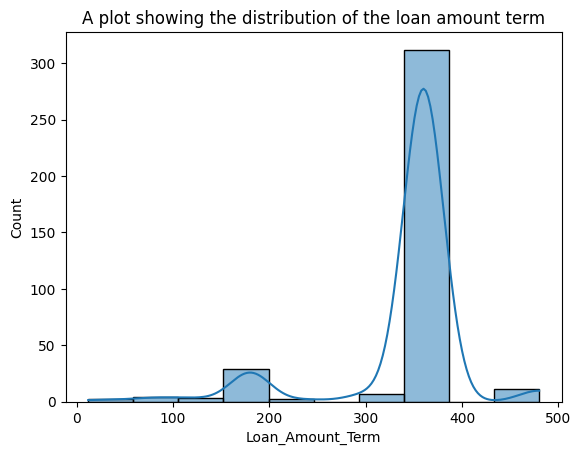

In [20]:
#A histogram
sns.histplot(loan, x = 'Loan_Amount_Term', kde = True)
plt.title("A plot showing the distribution of the loan amount term")

Text(0.5, 1.0, 'A plot showing the distribution of the loan amount term')

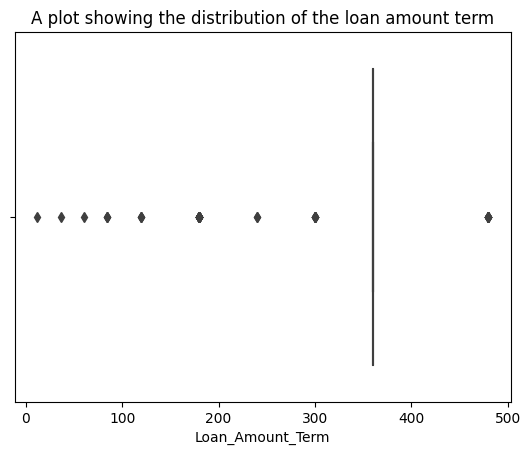

In [21]:
#a boxplot
sns.boxplot(loan, x = 'Loan_Amount_Term')
plt.title("A plot showing the distribution of the loan amount term")

In [22]:
med1= loan['Loan_Amount_Term'].median()
med1

360.0

In [23]:
#for confirmation
med2 = np.nanmedian(loan['Loan_Amount_Term'])
med2

360.0

In [24]:
mean1 = loan['Loan_Amount_Term'].mean()
mean1

340.86486486486484

In [25]:
mean2 = np.mean(loan['Loan_Amount_Term'])
mean2

340.86486486486484

In [26]:
mod1 = loan['Loan_Amount_Term'].mode()
mod1

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [27]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [28]:
#filling the missing values
loan.fillna({'Loan_Amount_Term': med1}, inplace = True)
loan.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'A plot showing credit history')

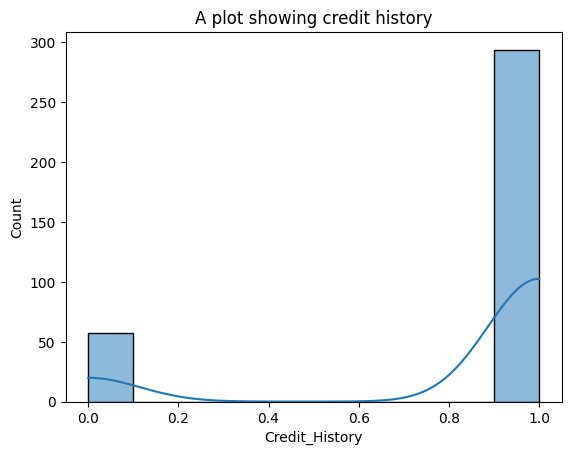

In [29]:
#histogram of credit history
sns.histplot(loan, x = 'Credit_History', kde = True )
plt.title("A plot showing credit history")

In [30]:
med_ced = loan['Credit_History'].median()
med_ced

1.0

In [31]:
med_mean = loan['Credit_History'].mean()
med_mean

0.8376068376068376

In [32]:
med_mode = loan['Credit_History'].mode()
med_mode

0    1.0
Name: Credit_History, dtype: float64

In [33]:
#filling in the missing values
loan.fillna({'Credit_History': med_ced}, inplace = True)
loan.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64